In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use("science")
import pathlib
import astropy.units as u
home = pathlib.Path.home()

In [12]:
start_time = (-2.671e7)

In [13]:
# plt.rcParams["font.family"] = "Times New Roman"

In [14]:
plt.style.available
# plt.rcParams["font.family"] = "DejaVu Sans"

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'sans',
 'scatter',
 'science',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [15]:
headers = ['time [s]','L(E>0.1keV)', 'L(E>0.2keV)', 'L(E>0.3keV)', 'L(E>0.5keV)', 'L(E>1keV)', 'L(E>2keV)', 'L(E>5keV)', 'L(E>10keV)']

path = os.path.join(home, "code/project/scripts/xray-luminosity/xray-lum-wr140-mhd-n256.txt")
df = pd.read_csv(path, sep=' ', names=headers, index_col=False)
df.head()

,time [s],L(E>0.1keV),L(E>0.2keV),L(E>0.3keV),L(E>0.5keV),L(E>1keV),L(E>2keV),L(E>5keV),L(E>10keV)
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,22.312463,8.733955e+29,2.758858e+29,1.081522e+29,4.063952e+28,3.423708e+26,6.930536e+24,3.446708e+24,1.292002e+24
2,43255.165575,3.273713e+32,8.751115e+31,3.799676e+31,1.685462e+31,4.323274e+29,4.896696e+27,9.431686e+25,2.685930e+25
3,157746.572434,8.126827e+30,1.603263e+30,7.088176e+29,3.446370e+29,3.925146e+28,8.109336e+27,2.320088e+27,7.632794e+26
4,264649.801700,4.802690e+30,1.351217e+30,8.011554e+29,5.008375e+29,6.275069e+28,1.011933e+28,2.590525e+27,8.554630e+26


In [16]:
# df2 = pd.read_csv('/home/visitor_ap4/code/project/scripts/xray-luminosity/xray-lum-wr140-mhd-n128.txt', sep=' ', names=headers, index_col=False)

In [17]:
df['L(2keV < E < 10keV)'] = df['L(E>2keV)'] - df['L(E>10keV)']
df['time [s]'] = (df['time [s]'] + start_time) / (24*60*60)
df.rename(columns={'time [s]': 'time [d]'}, inplace=True)
df.head()

,time [d],L(E>0.1keV),L(E>0.2keV),L(E>0.3keV),L(E>0.5keV),L(E>1keV),L(E>2keV),L(E>5keV),L(E>10keV),L(2keV < E < 10keV)
0,-309.143519,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-309.143260,8.733955e+29,2.758858e+29,1.081522e+29,4.063952e+28,3.423708e+26,6.930536e+24,3.446708e+24,1.292002e+24,5.638534e+24
2,-308.642880,3.273713e+32,8.751115e+31,3.799676e+31,1.685462e+31,4.323274e+29,4.896696e+27,9.431686e+25,2.685930e+25,4.869837e+27
3,-307.317748,8.126827e+30,1.603263e+30,7.088176e+29,3.446370e+29,3.925146e+28,8.109336e+27,2.320088e+27,7.632794e+26,7.346056e+27
4,-306.080442,4.802690e+30,1.351217e+30,8.011554e+29,5.008375e+29,6.275069e+28,1.011933e+28,2.590525e+27,8.554630e+26,9.263865e+27


In [18]:
# df2['L(2keV < E < 10keV)'] = df2['L(E>2keV)'] - df2['L(E>10keV)']
# df2['time [s]'] = df2['time [s]'] / (24*60*60)
# df2.rename(columns={'time [s]': 'time [d]'}, inplace=True)
# df2.head()

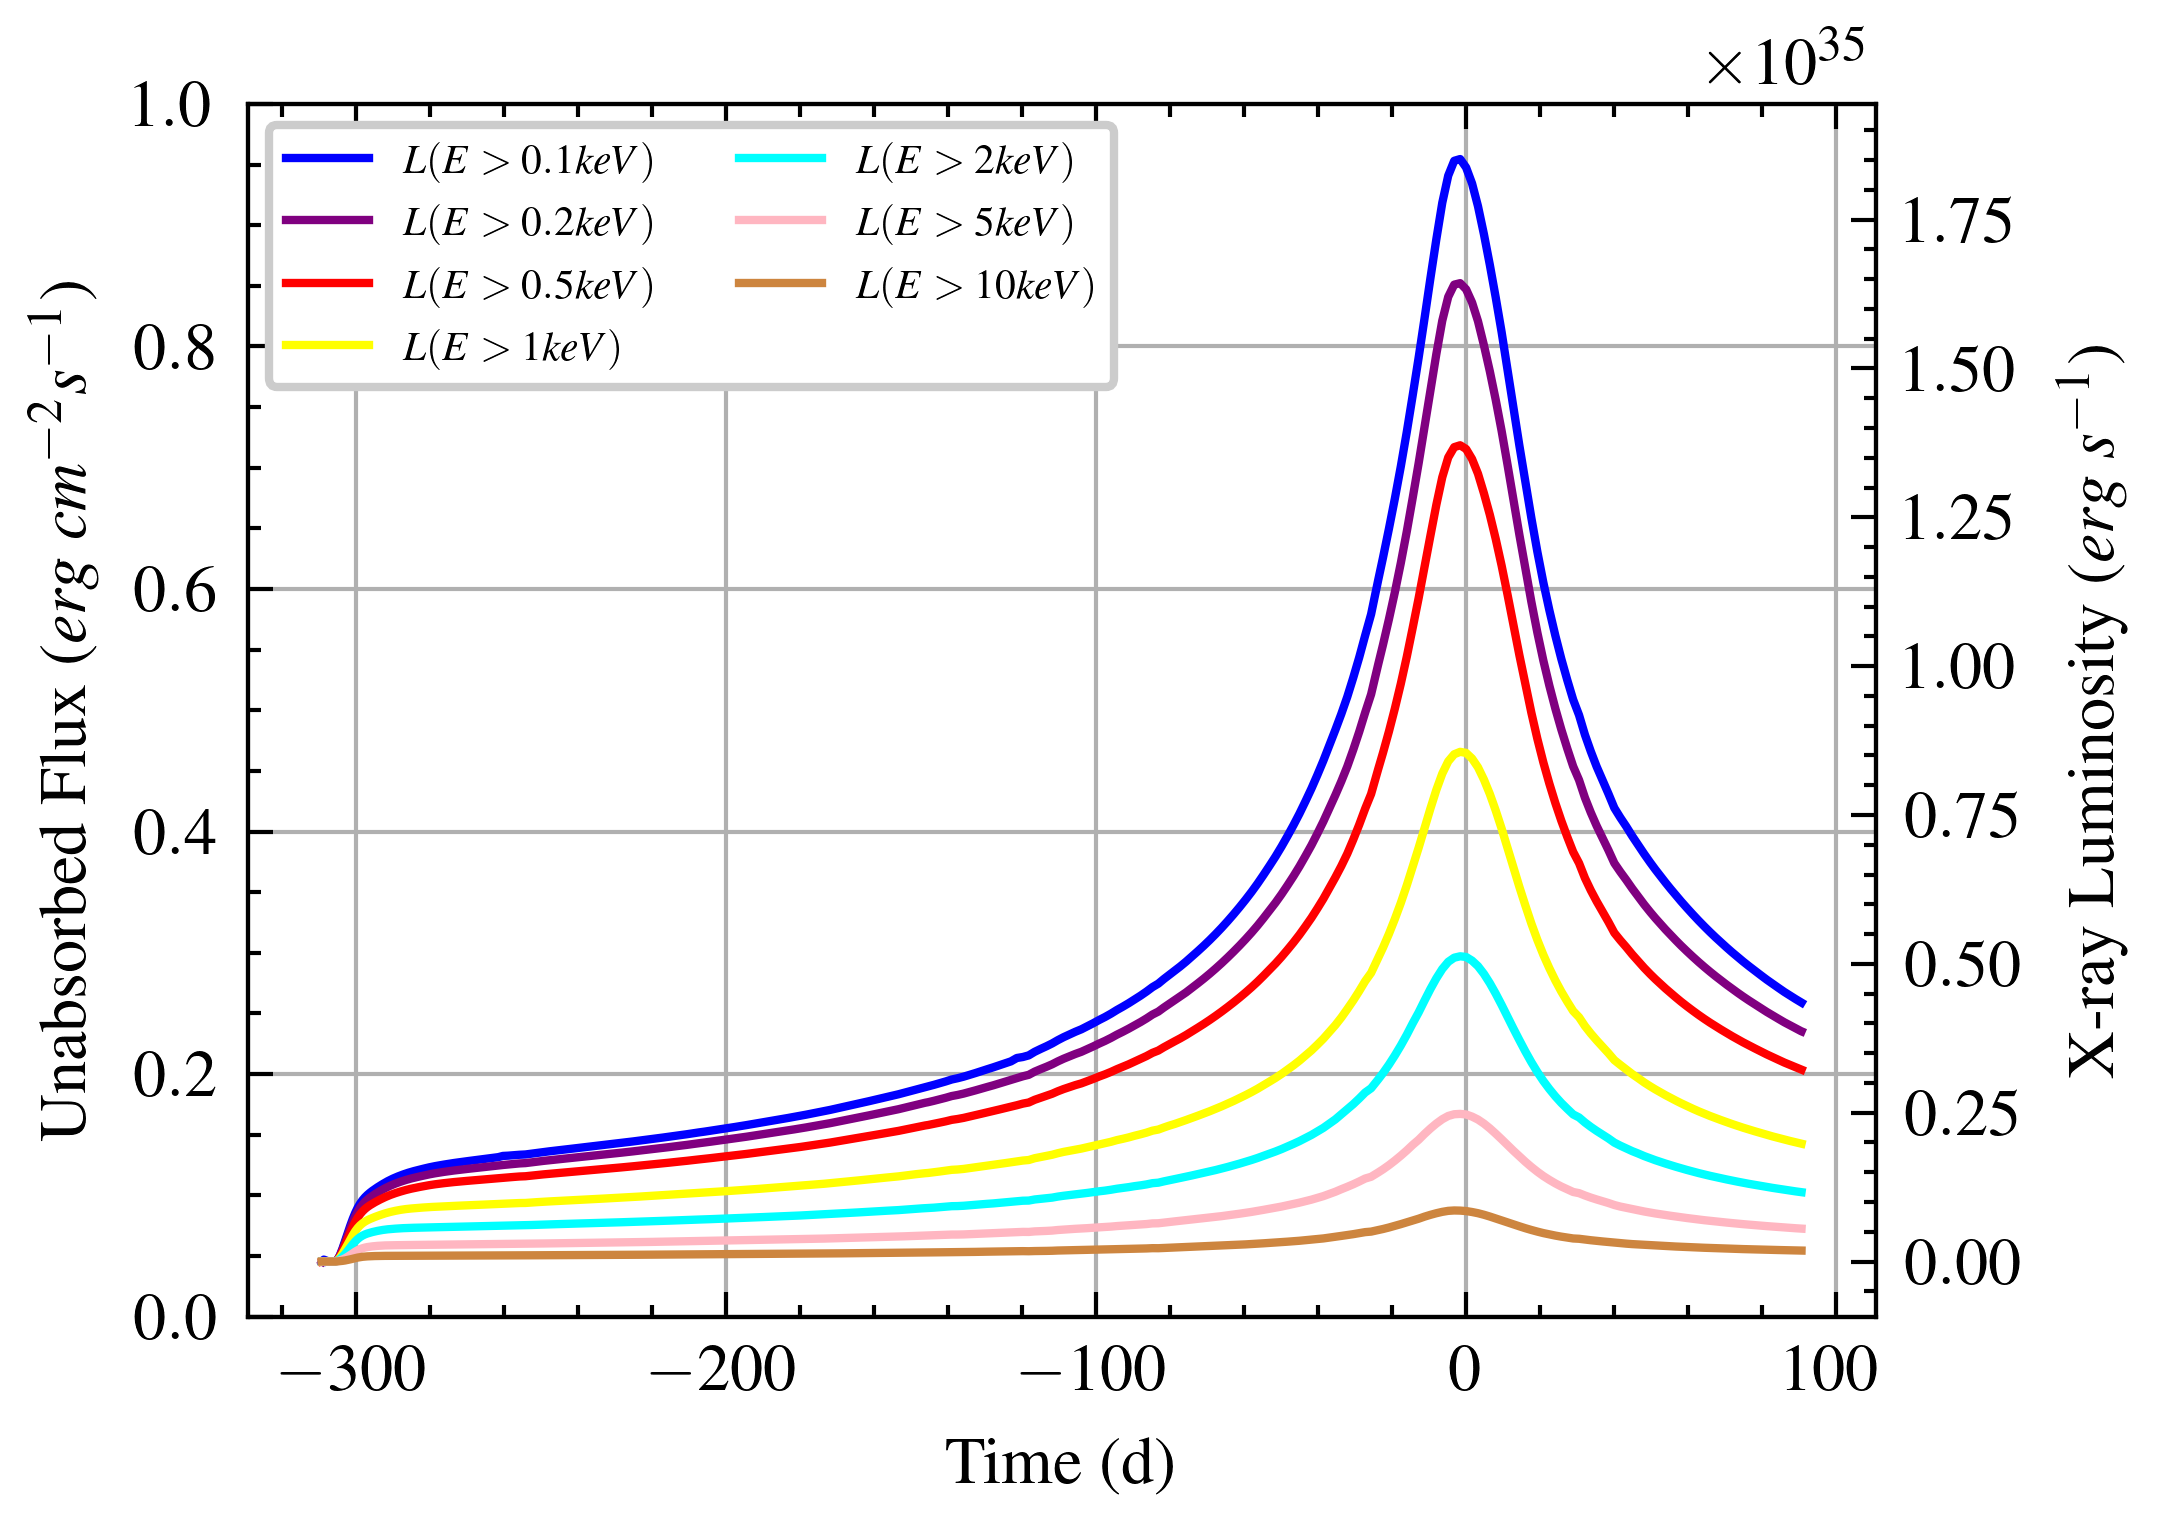

In [19]:
fig, ax1 = plt.subplots()

# plt.title("Unabsorbed Flux vs Time")
ax1.set_xlabel('Time (d)')
ax1.set_ylabel('Unabsorbed Flux ($erg$ $cm^{-2}$$s^{-1}$)')

ax1.grid(True)

ax2 = ax1.twinx()  # create a second axes that shares the same x-axis

ax2.plot(df['time [d]'], df['L(E>0.1keV)'], color='blue', linestyle='solid', label='$L(E>0.1keV)$')
ax2.plot(df['time [d]'], df['L(E>0.2keV)'], color='purple', linestyle='solid', label='$L(E>0.2keV)$')
ax2.plot(df['time [d]'], df['L(E>0.5keV)'], color='red', linestyle='solid', label='$L(E>0.5keV)$')
ax2.plot(df['time [d]'], df['L(E>1keV)'], color='yellow', linestyle='solid', label='$L(E>1keV)$')
ax2.plot(df['time [d]'], df['L(E>2keV)'], color='cyan', linestyle='solid', label='$L(E>2keV)$')
ax2.plot(df['time [d]'], df['L(E>5keV)'], color='lightpink', linestyle='solid', label='$L(E>5keV)$')
ax2.plot(df['time [d]'], df['L(E>10keV)'], color='peru', linestyle='solid', label='$L(E>10keV)$')

ax2.set_ylabel('X-ray Luminosity ($erg$ $s^{-1}$)')
ax2.legend(loc='upper left', ncol=2, framealpha=1, frameon=True, fontsize=5)

[ 1.30581525e+38 -5.50430062e+01  3.14939541e+33] [1.27577509e+38 5.35609071e+01 4.13021072e+33]


(-3000.0, 4000.0)

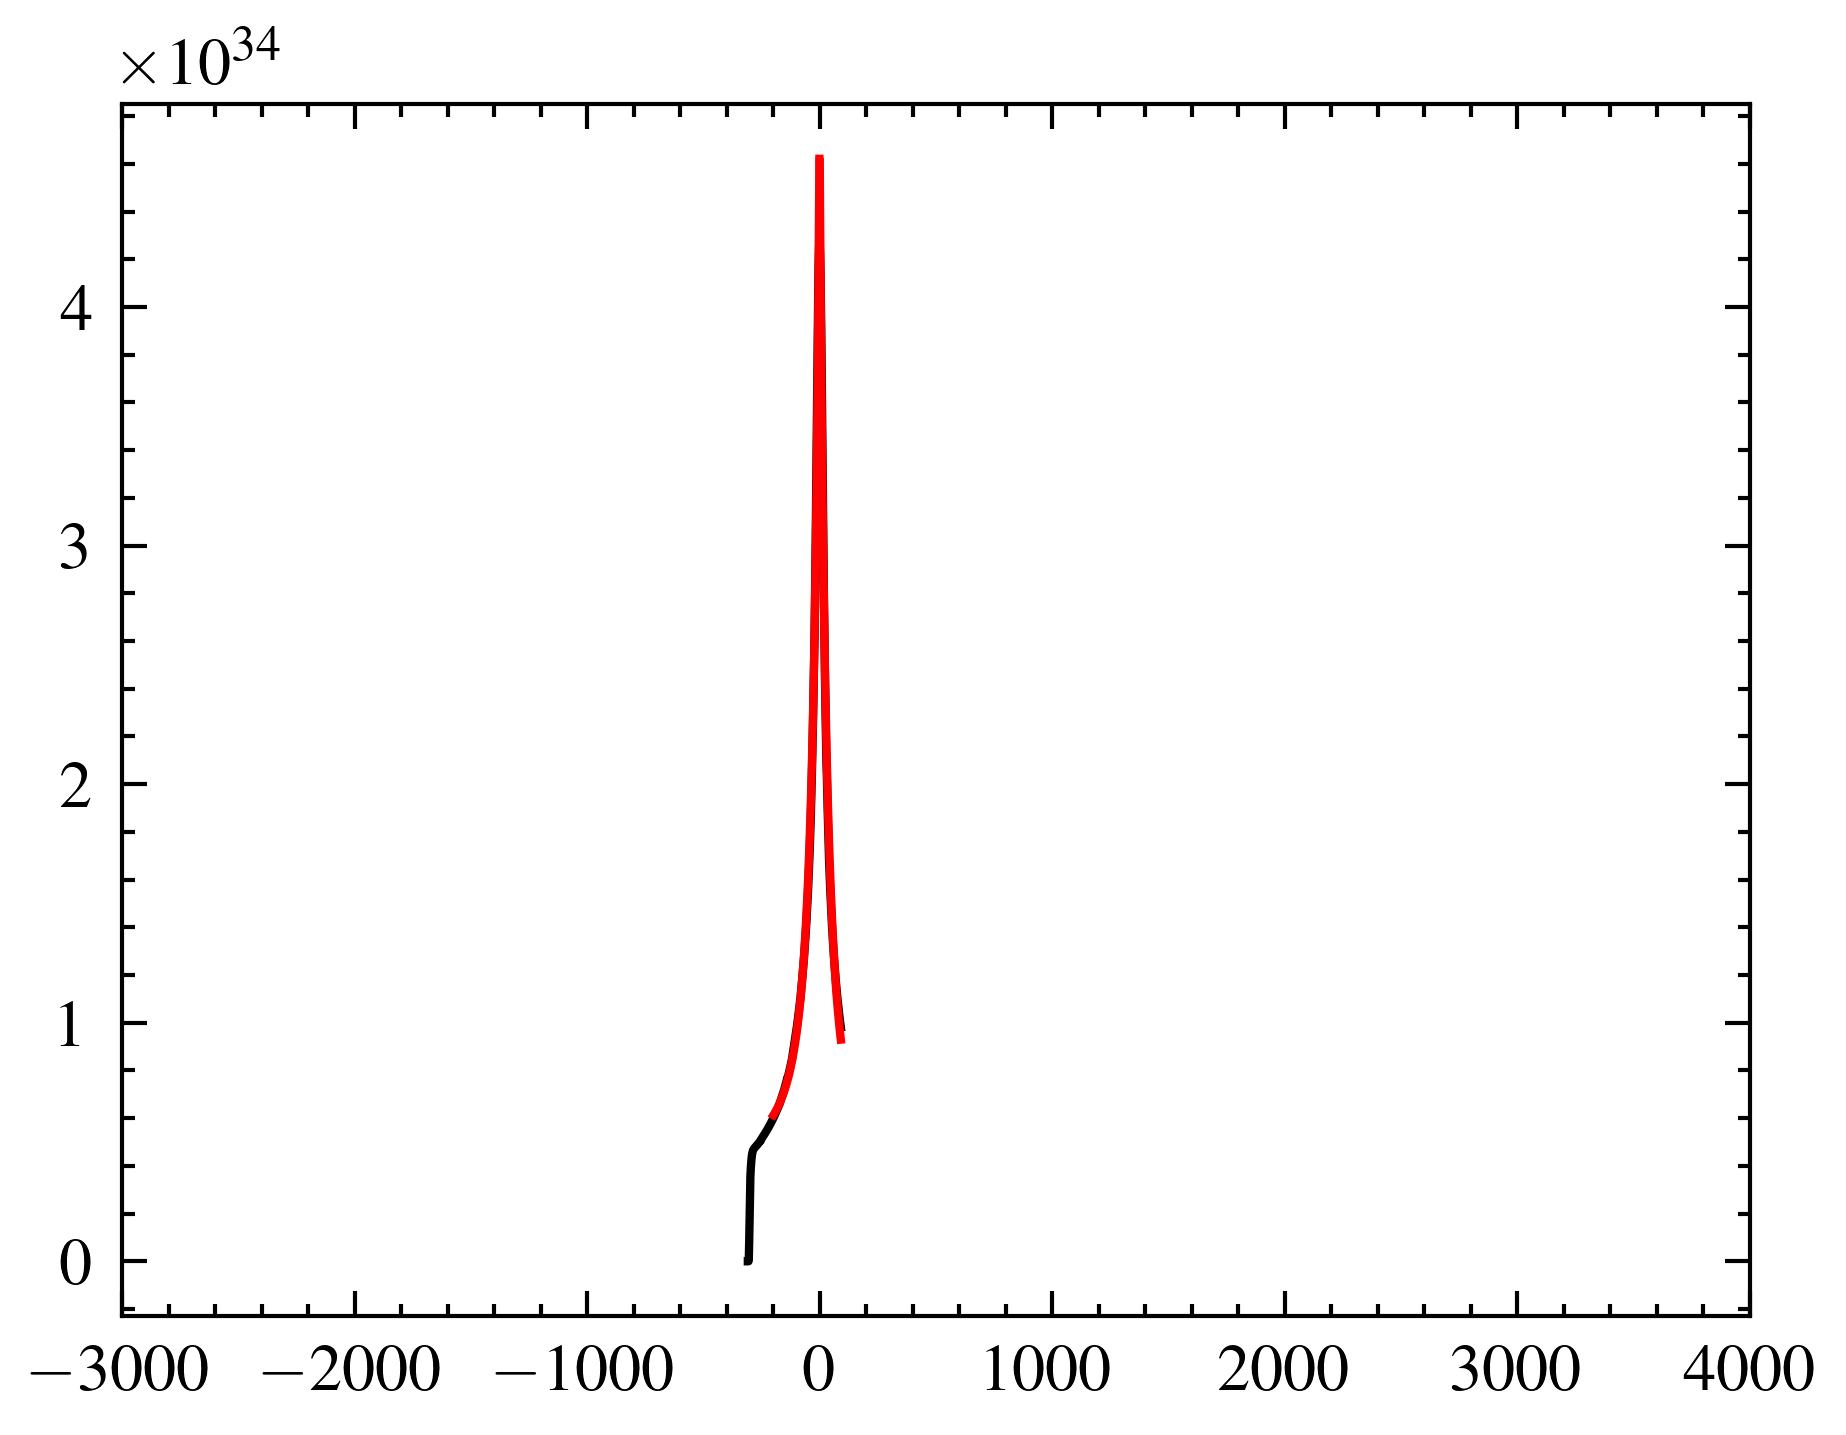

In [47]:
from scipy.optimize import curve_fit

def fitting_func(x, a, b, c):
    return a * 1/(x-b)**2 + c

df2 = df.loc[df['time [d]'] > 0]
df3 = df.loc[df['time [d]'] < 0]
df3 = df3.loc[df3['time [d]'] > -200]

times_pos = df2['time [d]']
times_neg = df3['time [d]']
luminosities_pos = df2['L(2keV < E < 10keV)']
luminosities_neg = df3['L(2keV < E < 10keV)']

plt.plot(df['time [d]'], df['L(2keV < E < 10keV)'], color='black')

fit1, cov1 = curve_fit(fitting_func, times_pos,luminosities_pos, p0=[2e34, 0, 0.7e34])
fit2, cov2 = curve_fit(fitting_func, times_neg,luminosities_neg, p0=[2e34, 0, 0.7e34])

print(fit1, fit2)
plt.plot(times_pos, fitting_func(times_pos, *fit1), color='red')
plt.plot(times_neg, fitting_func(times_neg, *fit2), color='red')
plt.xlim(-3000, 4000)


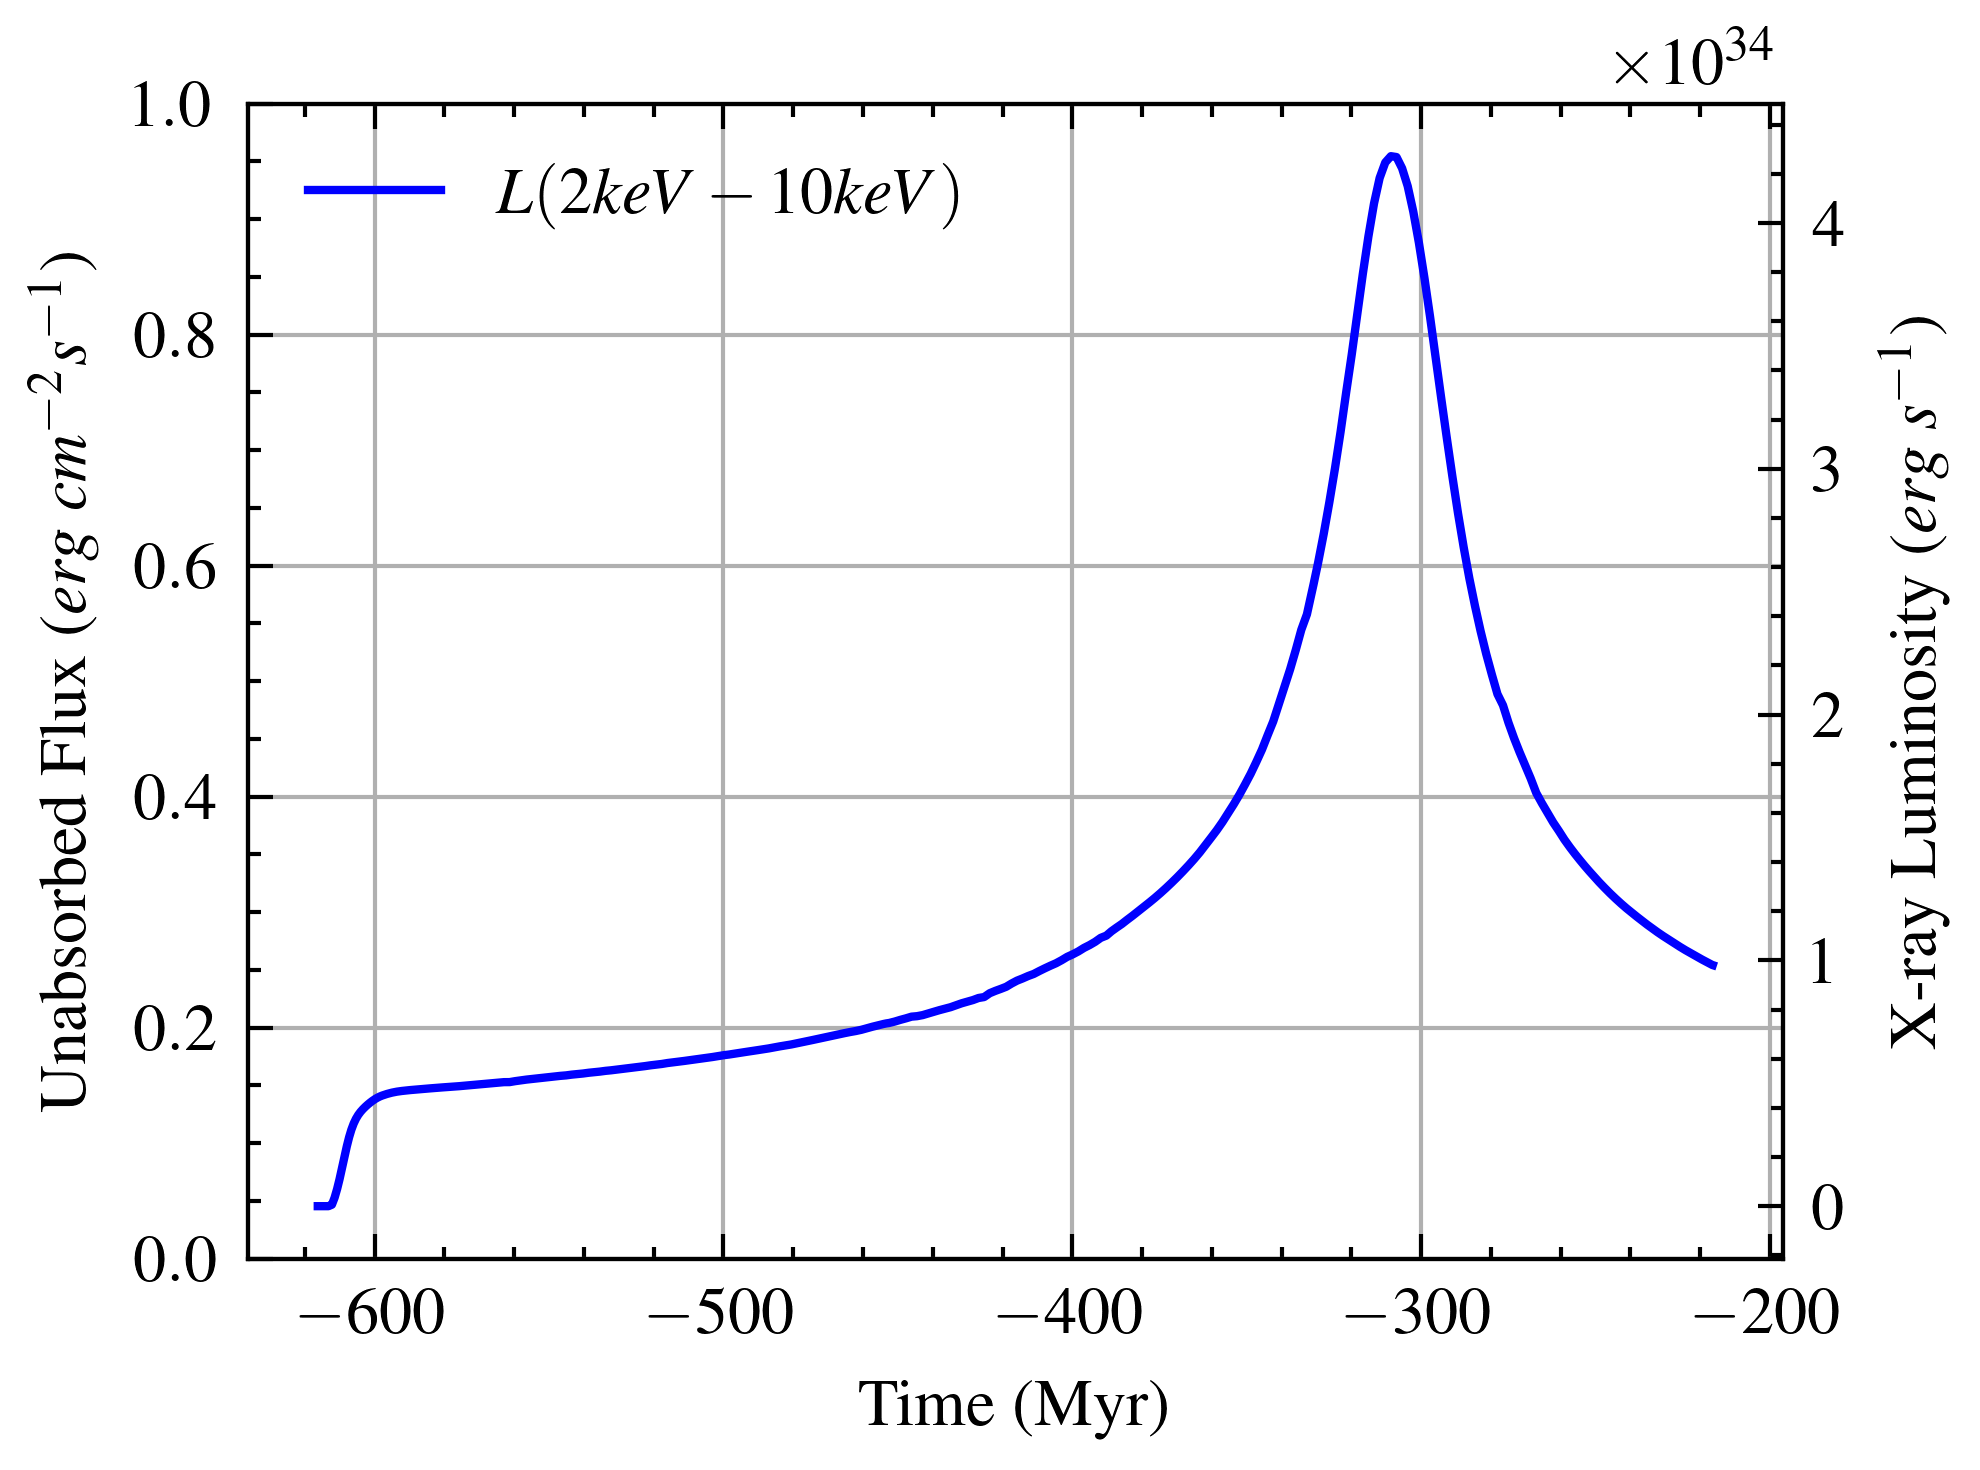

In [19]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time (Myr)')
ax1.set_ylabel('Unabsorbed Flux ($erg$ $cm^{-2}$$s^{-1}$)')

ax1.grid(True)

ax2 = ax1.twinx()  # create a second axes that shares the same x-axis

x = df['time [d]']-307.16
y = df['L(2keV < E < 10keV)'] #/max(df['L(2keV < E < 10keV)'])

ax2.plot(x, y, color='blue', linestyle='solid', label='$L(2keV - 10keV)$')

ax2.set_ylabel('X-ray Luminosity ($erg$ $s^{-1}$)')
ax2.legend(loc='upper left', ncol=2, framealpha=1)

In [111]:
# fig, ax1 = plt.subplots()
# ax1.set_xlabel('Time (Myr)')
# ax1.set_ylabel('Unabsorbed Flux ($erg$ $cm^{-2}$$s^{-1}$)')

# ax1.grid(True)

# ax2 = ax1.twinx()  # create a second axes that shares the same x-axis

# x = df['time [d]']-307.16
# y = df['L(2keV < E < 10keV)'] #/max(df['L(2keV < E < 10keV)'])

# ax2.plot(x, y, label='MHD', color='blue', linestyle='solid')
# # ax.plot(df2['time [d]'], df2['L(2keV < E < 10keV)'])
# ax2.set_xlabel("Days before periastron")
# ax2.set_ylabel('X-ray Luminosity ($erg$ $s^{-1}$)')
# # ax.set_title('X-ray Luminosity')
# # ax.set_ylim(0,1.1)
# ax2.set_xlim(-250,100)
# ax2.legend()
# ax2.grid()
# plt.show()
# plt.savefig('xray-lum-wr140-mhd-n256.png')

In [71]:
import matplotlib.pyplot as plt
import math
import numpy as np

from astropy import units as u

In [5]:
l01 = []
l02 = []
l03 = []
l05 = []
l1 = []
l2 = []
l5 = []
l10 = []
sim_time = []

# Read a line of numbers out of a text file:
with open("/home/visitor_ap4/code/project/scripts/xray-luminosity/xray-lum-wr140-hydro-n128.txt") as x:
    for line in x:
        data = line.split()
        l01.append(float(data[0]))
        l02.append(float(data[1]))
        l03.append(float(data[2]))
        l05.append(float(data[3]))
        l1.append(float(data[4]))
        l2.append(float(data[5]))
        l5.append(float(data[6]))
        l10.append(float(data[7]))
        sim_time.append(float(data[8]))


l01 = np.array(l01)
l02 = np.array(l02)
l03 = np.array(l03)
l05 = np.array(l05)
l1 = np.array(l1)
l2 = np.array(l2)
l5 = np.array(l5)
l10 = np.array(l10)
sim_time = np.array(sim_time) / 31536000 / 1e6

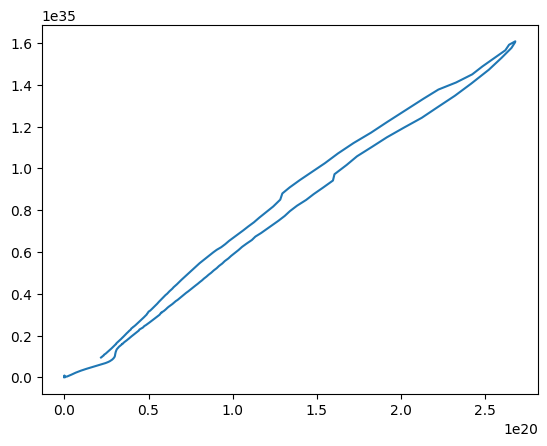

In [13]:
plt.plot(sim_time, l02-l10)